In [17]:
import sys
import os
sys.path.append(os.path.abspath("../src"))


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

from model import get_resnet18_model
from grad_cam import GradCAM
from utils import get_dataloaders

In [23]:
from utils import get_dataloaders

# Load class names using your existing dataloader utility
_, _, class_names = get_dataloaders("../data/brain_tumor_dataset", batch_size=16, model_type="resnet")

# Print the mapping
print("🔍 Class Index to Tumor Type Mapping:")
for idx, name in enumerate(class_names):
    print(f"{idx}: {name}")


🔍 Class Index to Tumor Type Mapping:
0: glioma_tumor
1: meningioma_tumor
2: no_tumor
3: pituitary_tumor


In [20]:
def visualize_gradcam_for_image(image_path, model_path="../resnet18_model.pth"):
    # Load class names
    _, _, class_names = get_dataloaders("../data/brain_tumor_dataset", batch_size=16, model_type="resnet")

    # Load trained model
    model = get_resnet18_model(num_classes=len(class_names))
    model.load_state_dict(torch.load(model_path, map_location="cpu"))
    model.eval()

    # Initialize Grad-CAM
    target_layer = model.layer4[1].conv2
    cam = GradCAM(model, target_layer)

    # Define transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # Predict
    output = model(input_tensor)
    predicted_class = output.argmax().item()
    predicted_label = class_names[predicted_class]

    # Generate Grad-CAM heatmap
    heatmap = cam.generate(input_tensor, predicted_class)

    # Convert image to array for overlay
    original = np.array(image.resize((224, 224)))
    heatmap_img = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(original, 0.6, heatmap_img, 0.4, 0)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM - Predicted: {predicted_label} ({predicted_class})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    print(f"✅ Predicted class: {predicted_class}")
    print(f"🧠 Tumor type: {predicted_label}")

### Checking if model predicts Meningioma tumor correclty using Grad-Cam

c:\Users\Avani Bhat\Desktop\Brain Tumor Classification Project\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Avani Bhat\Desktop\Brain Tumor Classification Project\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Avani Bhat\Desktop\Brain Tumor Classification Project\.venv\Lib\site-packages\torch\nn\modules\module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook wil

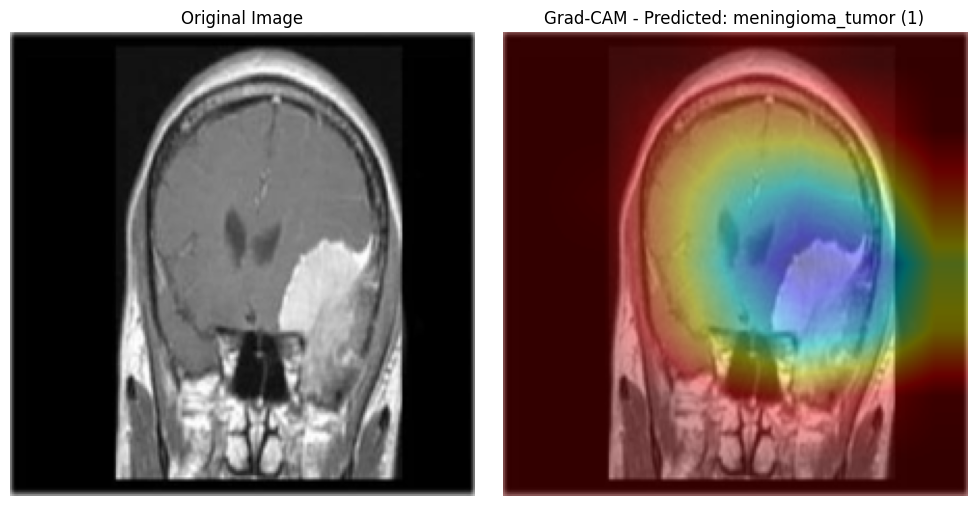

✅ Predicted class: 1
🧠 Tumor type: meningioma_tumor


In [21]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/meningioma_tumor/image(1).jpg")


c:\Users\Avani Bhat\Desktop\Brain Tumor Classification Project\.venv\Lib\site-packages\torch\nn\modules\module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


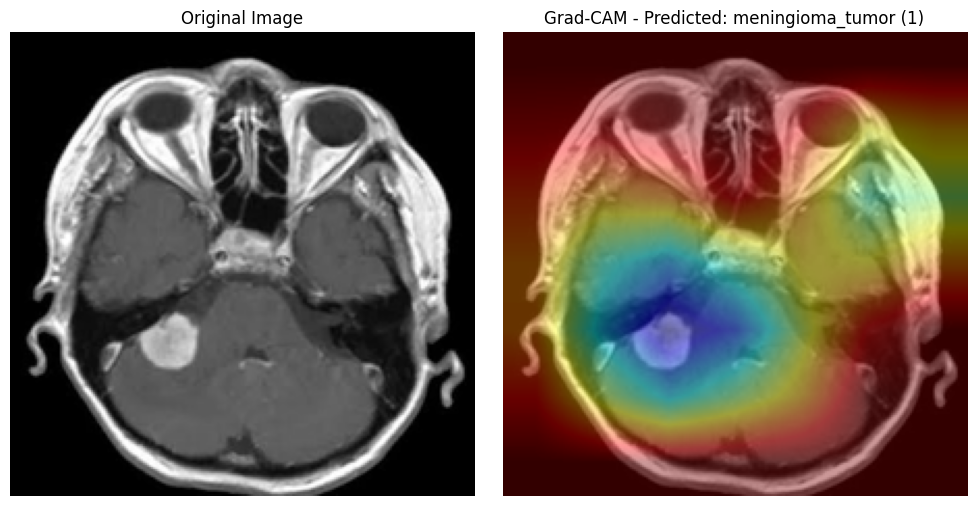

✅ Predicted class: 1
🧠 Tumor type: meningioma_tumor


In [25]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/meningioma_tumor/image(4).jpg")


### Checking if model predicts Pituitary tumor correclty using Grad-Cam

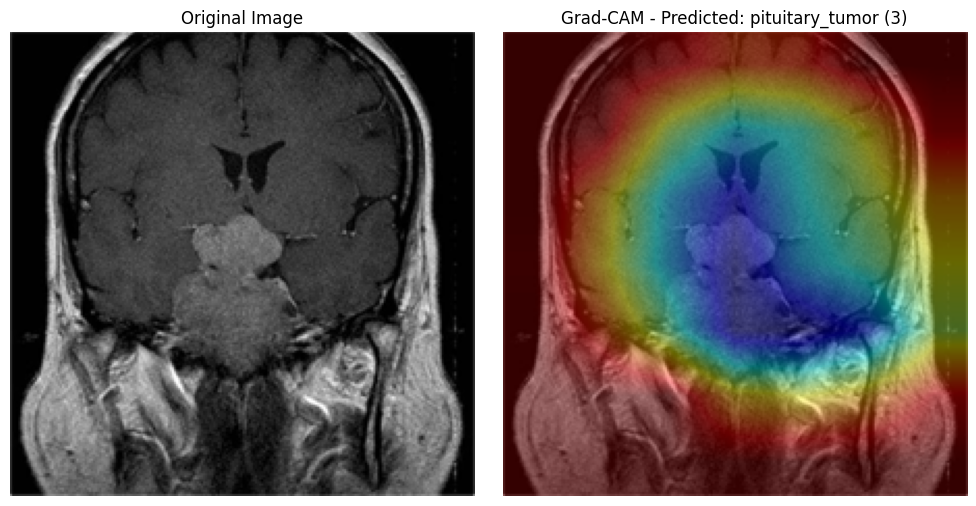

✅ Predicted class: 3
🧠 Tumor type: pituitary_tumor


In [27]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/pituitary_tumor/image(5).jpg")


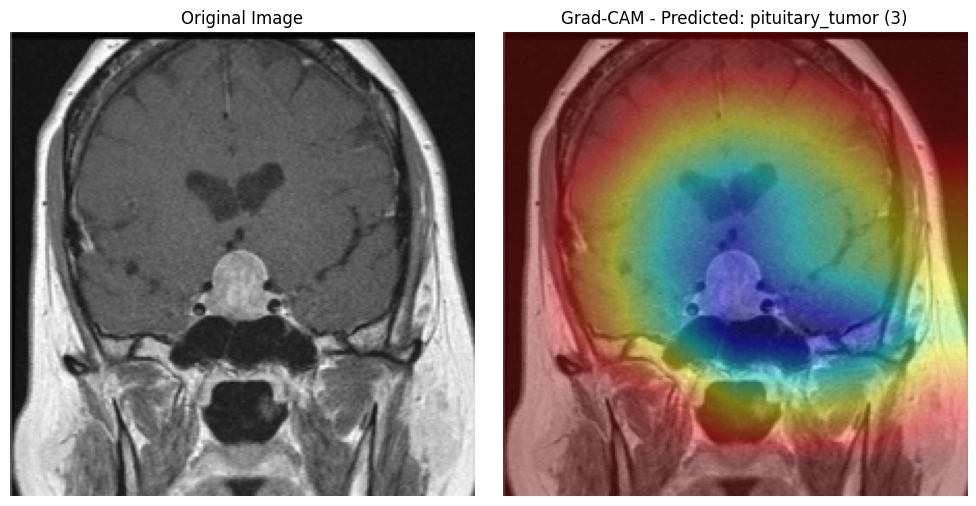

✅ Predicted class: 3
🧠 Tumor type: pituitary_tumor


In [34]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/pituitary_tumor/image(27).jpg")


### Checking if model predicts Glioma tumor correclty using Grad-Cam

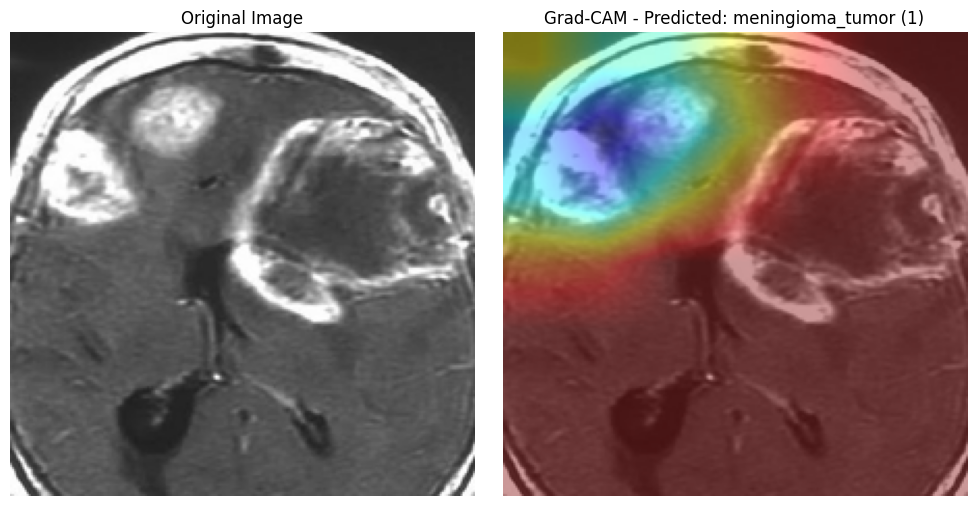

✅ Predicted class: 1
🧠 Tumor type: meningioma_tumor


In [28]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/glioma_tumor/image(5).jpg")


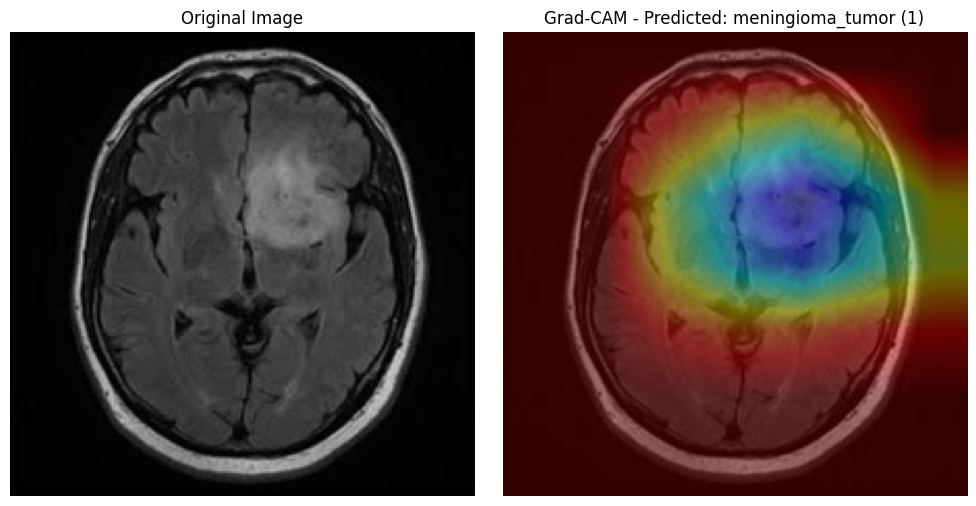

✅ Predicted class: 1
🧠 Tumor type: meningioma_tumor


In [29]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/glioma_tumor/image(6).jpg")


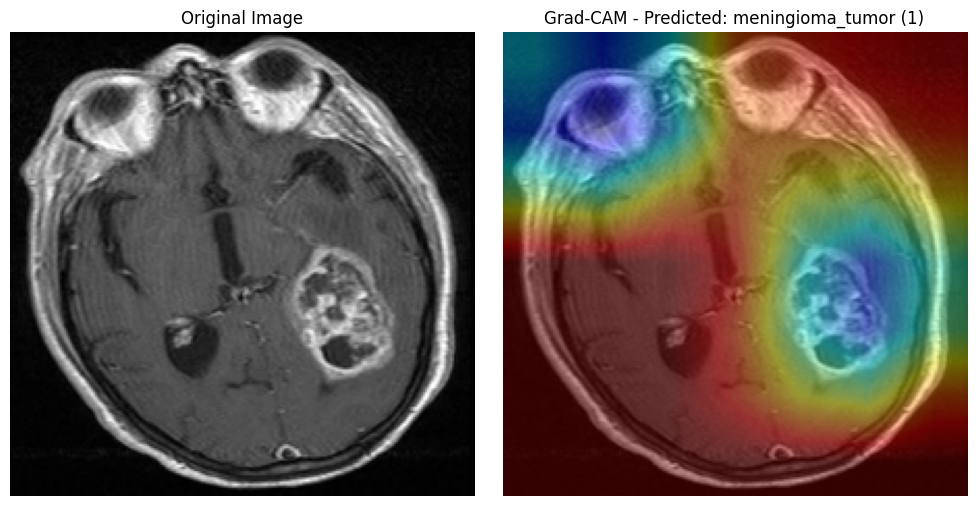

✅ Predicted class: 1
🧠 Tumor type: meningioma_tumor


In [30]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/glioma_tumor/image(99).jpg")


### Checking if model predicts No tumor correclty using Grad-Cam

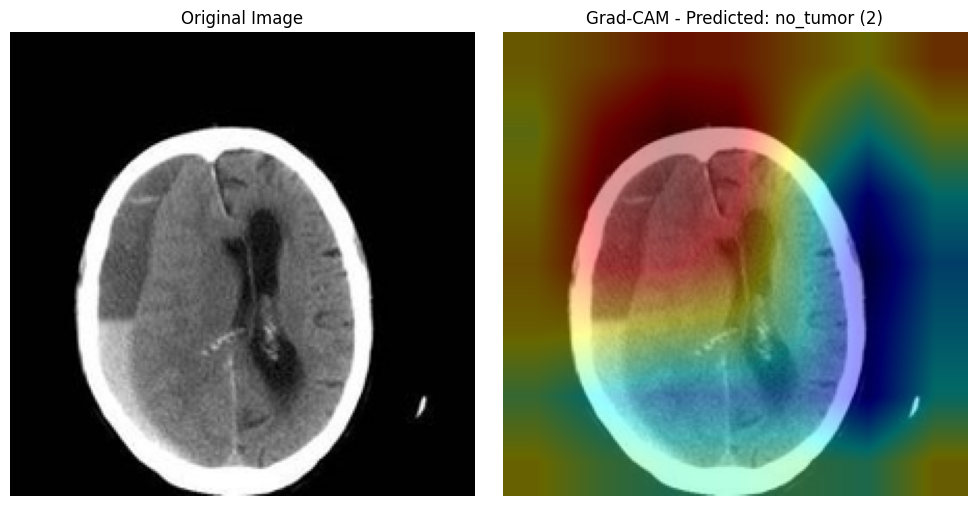

✅ Predicted class: 2
🧠 Tumor type: no_tumor


In [31]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/no_tumor/image(1).jpg")


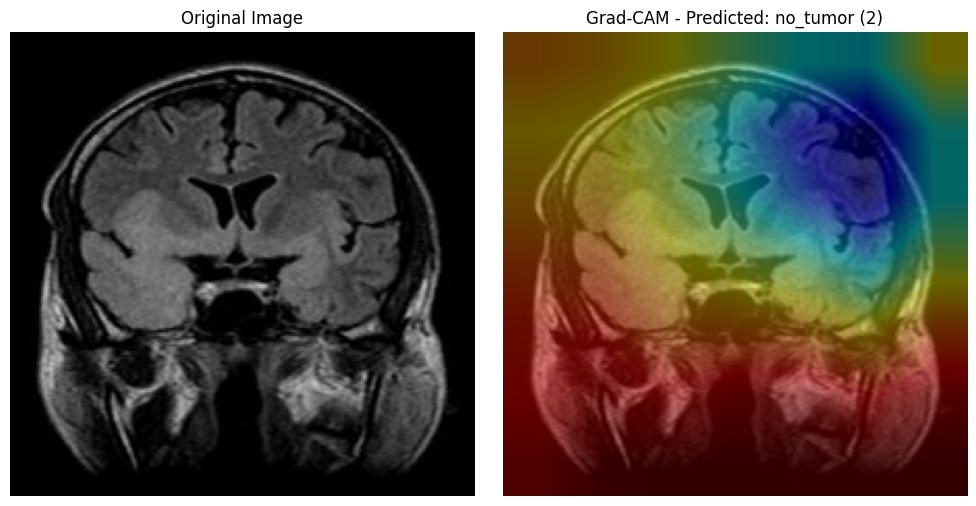

✅ Predicted class: 2
🧠 Tumor type: no_tumor


In [33]:
visualize_gradcam_for_image("../data/brain_tumor_dataset/Testing/no_tumor/image(5).jpg")


# So the model is struggling to detect Glioma tumors correctly 